<a href="https://colab.research.google.com/github/ruslanmv/Neural-Networks-from-Scratch/blob/master/Hyperparameter_Tuning_with_Keras_Tuner_MMORPG_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hyperparameter Tuning with Keras Tuner in MMORPG-AI

In [1]:
!pip install keras-tuner

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import kerastuner
    
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.8.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  


In [3]:
def df_to_numpy_image(df_image_clean,index):
    #select the row with index label 'index'
    image_clean=df_image_clean.loc[[index]].T.to_numpy()
    lists =image_clean.tolist()
    # Nested List Comprehension to flatten a given 2-D matrix
    # 2-D List
    matrix = lists
    flatten_matrix = [val.tolist() for sublist in matrix for val in sublist]
    # converting list to array
    arr = np.array(flatten_matrix)
    return arr
def df_to_numpy_input(df_input,index): 
    # flattening a 2d numpy array
    # into 1d array
    # and remove dtype at the end of numpy array
    lista=df_input.loc[[index]].values.tolist()
    arr=np.array(lista).ravel()
    return arr
#round a float up to next even number
import math
def roundeven(f):
    return math.ceil(f / 2.) * 2

In [4]:
#We define the parameters
width= 480
height= 270
ncolors=3
#Normalization Parameter
Norma        = 29/1000
#Paramters                          Operation 
filters1     =  roundeven(96*Norma)   #1
kernel1      =  11       
stride1      =  4
kernel2      =  3                     #2
stride2      =  2
filters3     =  roundeven(256*Norma)  #3
kernel3      =  5
kernel4      =  3                     #4
stride4      =  2
filters5     =  roundeven(384*Norma)  #5
kernel5      =  3
filters6     =  roundeven(384*Norma)  #6
kernel6      =  3
filters7     =  roundeven(256*Norma)  #7
kernel7      =  3
kernel8      =  3                      #8
stride8      =  2 
activation9  =  roundeven(4096*Norma)  #9
activation10 =  roundeven(4096*Norma)  #10
outputs11    =  int(1000*Norma)   #11

dropout13=0.5
dropout15=0.5
learning_rate17=0.001
np.random.seed(1000)

In [5]:

# Function to create model, required for KerasClassifier
def create_model1():
    # create model
    #model = Sequential()
    #model.add(Dense(12, input_dim=8, activation='relu'))
    #model.add(Dense(1, activation='sigmoid'))
    #Instantiation
    MmoNet = Sequential()
    MmoNet.add(Conv2D(filters=filters1, input_shape=(height, width, ncolors), kernel_size=(11,11), strides=(stride1,stride1), padding='same'))
    MmoNet.add(BatchNormalization())
    MmoNet.add(Activation('relu'))
    MmoNet.add(MaxPooling2D(pool_size=(kernel2,kernel2), strides=(stride2,stride2), padding='same'))
    MmoNet.add(Conv2D(filters=filters3, kernel_size=(kernel3, kernel3), padding='same'))
    MmoNet.add(BatchNormalization())
    MmoNet.add(Activation('relu'))
    MmoNet.add(MaxPooling2D(pool_size=(kernel4,kernel4), strides=(stride4,stride4), padding='same'))
    #3rd Convolutional Layer
    MmoNet.add(Conv2D(filters=filters5, kernel_size=(kernel5,kernel5), padding='same'))
    MmoNet.add(BatchNormalization())
    MmoNet.add(Activation('relu'))
    #4th Convolutional Layer
    MmoNet.add(Conv2D(filters=filters6, kernel_size=( kernel6, kernel6), padding='same'))
    MmoNet.add(BatchNormalization())
    MmoNet.add(Activation('relu'))
    #5th Convolutional Layer
    MmoNet.add(Conv2D(filters=filters7, kernel_size=(kernel7,kernel7),  padding='same'))
    MmoNet.add(BatchNormalization())
    MmoNet.add(Activation('relu'))
    MmoNet.add(MaxPooling2D(pool_size=(kernel8,kernel8), strides=(stride8,stride8), padding='same'))
    #Passing it to a Fully Connected layer
    MmoNet.add(Flatten())
    # 1st Fully Connected Layer
    MmoNet.add(Dense(activation9, input_shape=(270, 480, 3,)))
    MmoNet.add(BatchNormalization())
    MmoNet.add(Activation('relu'))
    # Add Dropout to prevent overfitting
    MmoNet.add(Dropout(dropout13))
    #2nd Fully Connected Layer
    MmoNet.add(Dense(activation10))
    MmoNet.add(BatchNormalization())
    MmoNet.add(Activation('relu'))
    #Add Dropout
    MmoNet.add(Dropout(dropout15))
    #3rd Fully Connected Layer
    MmoNet.add(Dense(1000))
    MmoNet.add(BatchNormalization())
    MmoNet.add(Activation('relu'))
    #Add Dropout
    MmoNet.add(Dropout(dropout15))
    #Output Layer
    MmoNet.add(Dense(outputs11))
    MmoNet.add(BatchNormalization())
    MmoNet.add(Activation('softmax'))
    # Compile model
    MmoNet.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return MmoNet


In [6]:
# Neural Networks
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
model1 = create_model1()
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 68, 120, 4)        1456      
                                                                 
 batch_normalization (BatchN  (None, 68, 120, 4)       16        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 68, 120, 4)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 34, 60, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 60, 8)         808       
                                                                 
 batch_normalization_1 (Batc  (None, 34, 60, 8)        3

In [7]:
import os
user = "ruslanmv"
repo = "Neural-Networks-from-Scratch"
# remove local directory if it already exists
if os.path.isdir(repo):
    !rm -rf {repo}
!git clone https://github.com/{user}/{repo}.git

Cloning into 'Neural-Networks-from-Scratch'...
remote: Enumerating objects: 166, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 166 (delta 52), reused 36 (delta 16), pack-reused 84
Receiving objects: 100% (166/166), 317.36 MiB | 33.82 MiB/s, done.
Resolving deltas: 100% (77/77), done.
Checking out files: 100% (49/49), done.


In [8]:
import os
os.chdir('Neural-Networks-from-Scratch')

In [9]:
import pandas as pd
#Importing Gamepad library
#We load the images of the gameplay
x_training_data=pd.read_pickle('data/dfx-0.pkl')  
#We load the inputs of the of the gameplay
y_training_data=pd.read_pickle('data/dfy-0.pkl')

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(x_training_data, y_training_data, test_size=0.2, random_state=6)
# Train Image part ( 4 Dimensional)
X_image = np.array([df_to_numpy_image(X_train,i) for i in X_train.index])
X=X_image.reshape(-1,width,height,3)
#Train Input part ( 1 Dimensional )
Y = [df_to_numpy_input(y_train,i) for i in y_train.index]
# Test Image part ( 4 Dimensional)
test_image = np.array([df_to_numpy_image(X_valid,i) for i in X_valid.index])
test_x=test_image.reshape(-1,width,height,3)
## Test Input part( 1 Dimensional )
test_y = [df_to_numpy_input(y_valid,i) for i in y_valid.index]
  

In [12]:
Y_input=np.array(Y)

In [13]:
test_input=np.array(test_y)

In [14]:
x_train = X_image
y_train = Y_input
x_test=  test_image
y_test = test_input

In [15]:
#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


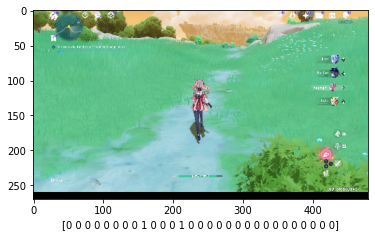

In [16]:
plt.imshow(x_train[0], cmap='binary')
plt.xlabel(y_train[0])
plt.show()

In [17]:
x_train.shape

(200, 270, 480, 3)

In [18]:
input_shape=(height, width, ncolors)
input_shape

(270, 480, 3)

In [19]:
def create_model(hp):
    if hp:
        dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5)
        num_units = hp.Choice('num_units', values=[8, 16, 32])
        learning_rate = hp.Float('learning_rate', min_value=0.0001, max_value=0.1)
        num_hidden_layers = hp.Choice('num_hidden_layers', values=[1, 2, 3])
    else:
        dropout_rate = 0.1
        num_units = 8
        learning_rate = 1e-4
        num_hidden_layers = 1
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=input_shape))
    model.add(tf.keras.layers.Lambda(lambda x: x/255.))
    
    for _ in range(0, num_hidden_layers):
        model.add(tf.keras.layers.Dense(num_units, activation='relu'))
        model.add(tf.keras.layers.Dropout(dropout_rate))
    
    model.add(tf.keras.layers.Dense(29, activation='softmax'))

    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate),
        metrics=['accuracy']
    )
    
    return model

In [20]:
create_model(None).summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 388800)            0         
                                                                 
 lambda (Lambda)             (None, 388800)            0         
                                                                 
 dense_4 (Dense)             (None, 8)                 3110408   
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 29)                261       
                                                                 
Total params: 3,110,669
Trainable params: 3,110,669
Non-trainable params: 0
_________________________________________________________________


In [21]:
class CustomTuner(kerastuner.tuners.BayesianOptimization):
    def run_trial(self, trial, *args, **kwargs):
        kwargs['batch_size'] = trial.hyperparameters.Int('batch_size', 32, 128, step=32)
        super(CustomTuner, self).run_trial(trial, *args, **kwargs)

In [22]:
tuner = CustomTuner(
    create_model,
    objective='val_accuracy',
    max_trials=20,
    directory='logs',
    project_name='fashion_mnist',
    overwrite=True,
)

In [23]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
dropout_rate (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': None, 'sampling': None}
num_units (Choice)
{'default': 8, 'conditions': [], 'values': [8, 16, 32], 'ordered': True}
learning_rate (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.1, 'step': None, 'sampling': None}
num_hidden_layers (Choice)
{'default': 1, 'conditions': [], 'values': [1, 2, 3], 'ordered': True}


In [24]:
tuner.search(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=5, verbose=False,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
    ]
)

InvalidArgumentError: ignored

In [ ]:
tuner.results_summary(1)

In [ ]:
model = tuner.get_best_models(num_models=1)[0]

model.summary()

In [ ]:
h = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20, verbose=2,
    batch_size=#Enter Batch Size,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
    ]
)

In [ ]:
model.evaluate(x_test, y_test)